### Stimulus encoding using MI estimator for the power time-series

In [1]:
import sys; sys.path.insert(1, '/home/vinicius/storage1/projects/GrayData-Analysis')
import os

import matplotlib.pyplot     as     plt
import matplotlib
import GDa.graphics.plot     as     plot

import numpy             as np
import xarray            as xr
import matplotlib.pyplot as plt

In [2]:
SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = plot.set_plot_config()

In [3]:
# Create directory to save figures
if not os.path.exists("img/n6.0.3"):
    os.makedirs("img/n6.0.3")

#### Load mutual information and p-values for the RFX analysis

In [5]:
_ROOT = os.path.expanduser('~/storage1/projects/GrayData-Analysis')
path_mi = os.path.join(_ROOT, "Results/lucy/mi_power_rfx/mi_power.nc")
path_pv = os.path.join(_ROOT, "Results/lucy/mi_power_rfx/pval_power.nc")

mi = xr.load_dataarray(path_mi)
pvalues = xr.load_dataarray(path_pv)

#### Remove values for p<=0.05

In [31]:
# Region to which each channels belongs to 
regions = {'a46D': 'prefrontal', 'a8B':'prefrontal', 'F6':'motor',
           'a9/46D':'prefrontal', 'a8M':'prefrontal', 'F7':'motor',
           'a8r':'prefrontal', 'a8L':'prefrontal', 'F2':'motor',
           'a44':'prefrontal', 'F1':'motor', 'a3':'somatosensory',
           'a2': 'somatosensory', 'a1': 'somatosensory', 'a7B': 'parietal',
           'AIP': 'parietal', 'a5': 'parietal', 'TPt': 'parietal', 
           'a7A': 'parietal', 'V4t': 'visual', 'DP': 'visual', 
           'MT': 'visual', 'V6A': 'visual', 'PIP': 'parietal',
           'V2': 'visual', 'V1': 'visual', 'LIP': 'parietal', 
           'a24c': 'prefrontal', 'STPc': 'temporal', 'SII': 'somatosensory', 
           'VIP': 'parietal', 'Thal': 'subcortical', 'MST': 'visual',
           'a46V': 'prefrontal', 'Core': 'auditory', 'Putamen': 'subcortical',
           'Ins': 'temporal', 'Caudate': 'subcortical', 'a7op': 'parietal', 
           'MB': 'subcortical', 'a23': 'parietal', 'a32': 'prefrontal',
           'FST': 'visual', 'MIP': 'parietal', 'Claustrum': 'subcortical',
           'a13': 'prefrontal', 'OPRO': 'prefrontal', 'V4': 'visual', 
           'V3': 'visual', 'PBr': 'auditory', 'a11': 'prefrontal', 
           'a45B': 'prefrontal', 'a45A': 'prefrontal', 'a24D': 'prefrontal',
           'a14': 'prefrontal', 'a12': 'prefrontal', 'a9/46V': 'prefrontal'}

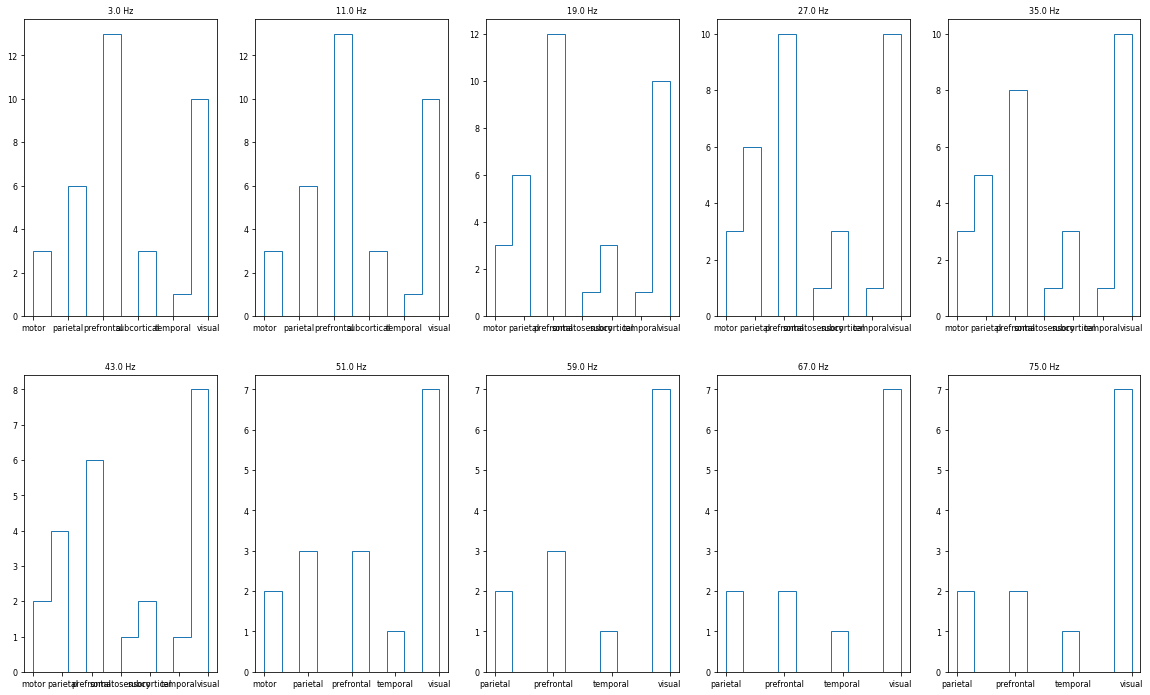

In [71]:
plt.figure(figsize=(20, 12))
for i in range(n_freqs):
    plt.subplot(2, 5, i+1)
    # Channels with siginificant MI
    idx = mi_sig.isel(freqs=i).sum("times") > 0 
    rois = mi_sig.isel(freqs=i).roi.values[idx]
    areas = np.sort( [regions.get(key) for key in rois] )
    plt.hist(areas, lw=1, histtype='step', fill=False, label=None)
    plt.title(f"{mi_sig.freqs.values[i]} Hz")

In [42]:
# Index of channels sorted by regions
isr = np.argsort( list( regions.values() ) )

In [32]:
mi_sig = mi * (pvalues <= 0.05)

In [33]:
# Number of rois
n_roi = mi.sizes["roi"]
# Number of frequencies
n_freqs = mi.sizes["freqs"]

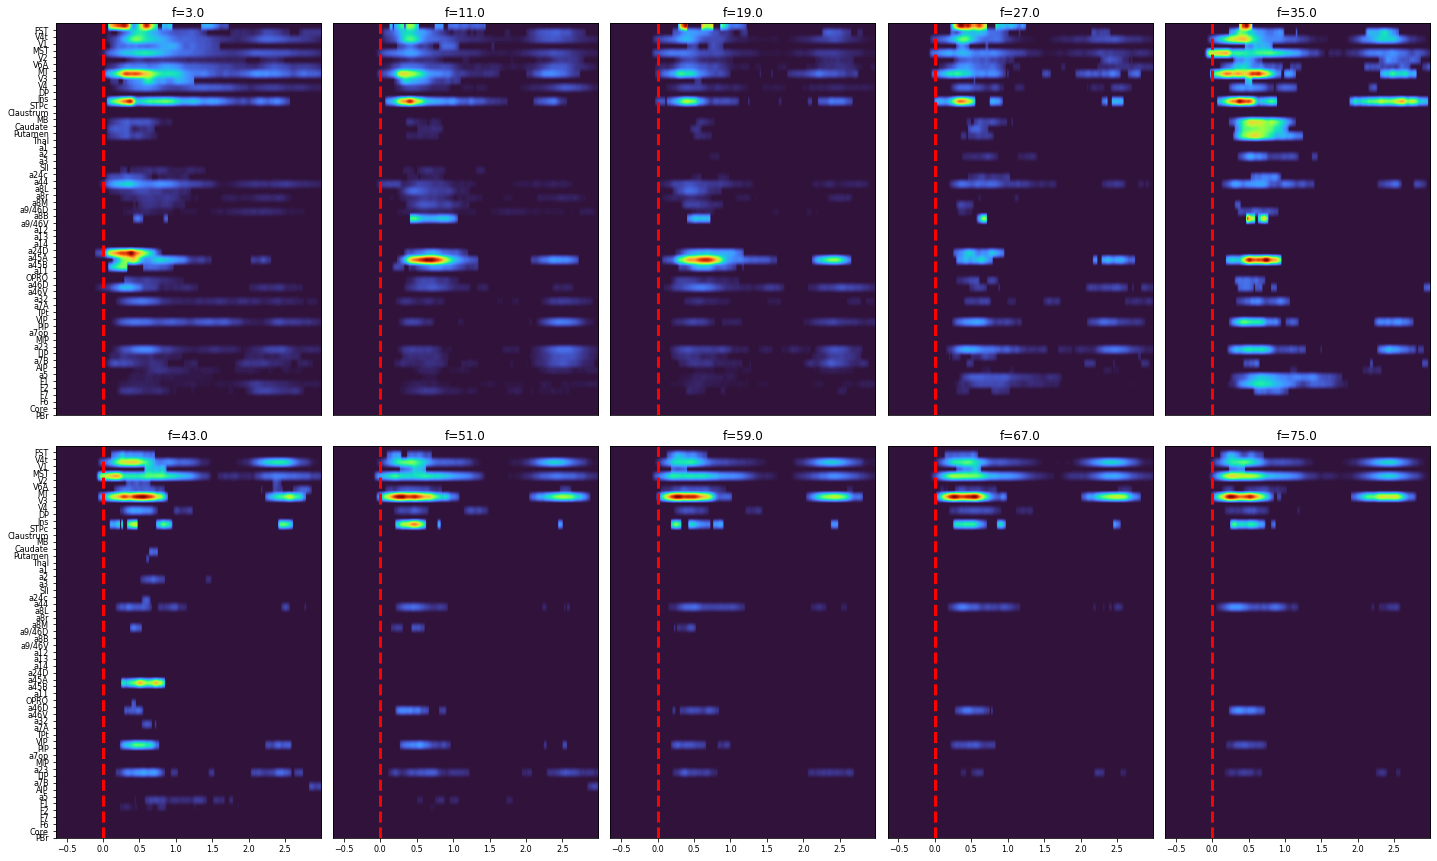

In [72]:
plt.figure(figsize=(20, 12))
for i in range(n_freqs):
    plt.subplot(2, 5, i+1)
    plt.imshow(mi_sig.isel(freqs=i,roi=isr).T,
               cmap="turbo", aspect="auto", origin="lower",
               extent=[mi_sig.times.values[0], mi_sig.times.values[-1], 0, n_roi])
    plt.vlines(0,0,n_roi,'r', ls='--', lw=3)
    if i==0 or i==5: plt.yticks(range(57), mi_sig.roi.values[isr])
    else: plt.yticks([])
    if i < 5: plt.xticks([])
    plt.title(f"f={mi_sig.freqs.values[i]}", fontsize=BIGGER_SIZE)
plt.tight_layout()
plt.savefig("mi_power.png")